In [1]:
print("Lecture-17")

Lecture-17


## Yazılardan Duygu veya Kanılara İlişkin Sonuçların Çıkartılması - IMDB Örneği

Yorumları yapan kişilerin öznel duyguları ve kanıları hakkında analizler yapmak isteyebiliriz. "duygusal/kanısal analiz (sentiment analysis)". 

IMDB veri kümesi filmler hakkındaki yorumlardan oluşmaktadır. Her yorum "olumlu (positive)" ya da "olumsuz (negative)" biçimde değerlendirilmektedir. Biz burada içeriğe bakarak bir yorumun olumlu mu yoksa olumsuz mu olduğunu tahmin eedcek bir model üzerinde çalışacağız. 

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Böyle bir duygusal/kanısal analizi nasıl yapabiliriz? Öncelikle yorum yazılarını bir biçimde sayısallaştıramamız gerekir. Çünkü ysa girdi olarak yazıları değil ancak sayıları alabilir. Peki bu örnekte yorum yazılarını nasıl sayısallaştırabiliriz? 

Yazıların sayısallaştırılması için uygulanan tipik bir yöntem şöyledir: Önce tüm yorumlardaki tüm sözcükler elde edilir. Buna vocabulary denilmektdir. Sonra bu sözcük haznesindeki tüm sözcüklere "tek olan(unique)" bir sayı karşılık getilir. Sonra da her sözcük yerine ona karş getirilen sayı kodlanır. Tabii gelen olarak bir sözcüğün "büyük harflerle yazılması ile küçük harflerle yazılması arasında fark olmadığı için sözcük haznesi" "büyük harf küçük harf duyarlılığı olmadan (case insensitive)" biçimde oluşturulabilir.

"film çok güzeldi, oyuncular muhteşem oynamışlar"

'film': 21
'çok': 6
'güzeldi': 2162
'oyuncular': 32
'muhteşem': 144
'oynamışlar': 5432

Böyle atamayı yapmanın pytonda pratik yöntemi bir sözlük kullanmaktır.

1) Sayıların bu biçimde kodlanması bir aralık ölçeği etkisi oluşturmaktadır. Halbuki sözcüklerin kategorik bir ölçekle ifade edilmesi daha uygundur.
2) Yorumlardaki sözcüklerin sayısı her yorumda farklı olabilmektedir. Halbuki sinir ağınının girdilerinin hep aynı sayıda olması gerekir.

Bu sorunları giderebilmek için "vektörizasyon (vectorization)" denilen bir yöntem kullanılmaktadır. Bu yöntemde her yorum için toplam sözcük haznesinin uzunluğu kadar bir dizi açılıp dizi sıfırlanır. Sonra dizinin yorum içerisindeki sözcük numaralrına karşı gelen indeksteki elemanları 1 yapılır. Böylece her yorum hem aynı uzunlukta bir vektörle temsil edilmiş olur hem de "bir çeşit binary encoding" yöntemiyle kategori kodlaması yapılmış olur. Örneğin toplam sözcük haznesinin 30000 olduğunu varsayalım.

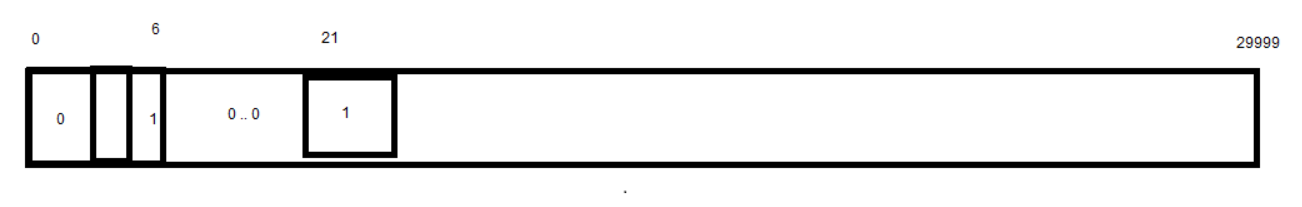

Bu tarzda vektörizasyon işlemi manuel olarak yapılabileceği gibi sckit-learn içerisindeki CountVectorizer sınıfı yardımıyla da yapılabilir. Bir yorumda aynı sözcük birden fazla kez geçerse yukarıdaki gibi bir vektörizasyon buradaki bilgiden faydalanamayacaktır. Uygulamacı isterse oluşturacağı vektörü 0 ve 1 biçiminde ikili değil de geçen sözcüklerin sayısı biçiminde de oluşturulabilir. Örneğin "çok" sözcüğü yazı içerisinde 4 kez geçiyorsa vektörün "çok" sözcüüğne karşı gelen indeksteki eleman 1 yapılmayıp 4 yapılır. 

Vektörizasyon işlemini manual yapmaya çlıaşlım:

In [2]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

In [21]:
import regex

word_set = set()

for i in range(len(df)):
    words = regex.findall("[A-Za-z-0-9'-]+", df.iloc[i, 0].lower())
    word_set.update(words)

In [22]:
word_dict = {word: index for index, word in enumerate(word_set)}

In [23]:
word_dict

{"'the": 0,
 'witchy': 1,
 'simple-looking': 2,
 'sawasdee': 3,
 'demented': 4,
 '10-12': 5,
 'underpar': 6,
 'mile-high': 7,
 "mathews'": 8,
 'corroborated': 9,
 'ex-kickboxer': 10,
 'ntmdm': 11,
 'friedl': 12,
 'prt': 13,
 'sticks': 14,
 'ever--but': 15,
 'cgis': 16,
 'kanga': 17,
 'cat--goes': 18,
 'lickerish': 19,
 'impolite': 20,
 'warm-up': 21,
 'janette': 22,
 'or-': 23,
 "men'": 24,
 "seen'em": 25,
 'imelda': 26,
 "poncelet's": 27,
 'coraline': 28,
 "matthau's": 29,
 'isten': 30,
 'vomit-defying': 31,
 'apprehended': 32,
 'musclebound': 33,
 'tss': 34,
 'lip-service': 35,
 'machakari': 36,
 "hands'": 37,
 'cheung': 38,
 "'coz": 39,
 'trc': 40,
 'palatial': 41,
 'avantegardistic': 42,
 "'wanna": 43,
 'proliferated': 44,
 'semi-comatose': 45,
 'vicious': 46,
 'anbody': 47,
 'blood-firing': 48,
 "order's": 49,
 'fix-it': 50,
 'lyc': 51,
 'poaching': 52,
 'it--though': 53,
 'air-conditioned': 54,
 'sanitation': 55,
 'codec': 56,
 'madly': 57,
 'well-earned': 58,
 "proust's": 59,
 '

In [17]:
import numpy as np

dataset_x = np.zeros((df.shape[0], len(word_dict)), dtype='int8')

for row, text in enumerate(df['review']):
    words = regex.findall("[A-Za-z-0-9'-]+", text.lower())
    word_indices = [word_dict[word] for word in words]
    dataset_x[row, word_indices] = 1

In [18]:
dataset_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [15]:
dataset_y = np.zeros(len(df), dtype='int8')
dataset_y[df['sentiment'] == 'positive'] = 1

In [16]:
dataset_y

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [24]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='IMDB')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.summary()

In [2]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=10, validation_split=0.2)

NameError: name 'training_dataset_x' is not defined

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

NameError: name 'hist' is not defined

: 

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Epoch-Binary Accuracy Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.xticks(hist.epoch)
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

In [ ]:
texts = ['the movie was very good. The actors played perfectly. I would recommend it to everyone', 'this movie is awful. The worst film i have ever seen', 'this movie not so good and not so bad. It is average film']

predict_vect = np.zeros((len(texts), len(word_dict)), dtype='int8')
for i in range(len(texts)):
    words = regex.findall("[A-Za-z-0-9'-]+", texts[i].lower())
    word_indices = [word_dict[word] for word in words]
    predict_vect[i, word_indices] = 1

predict_result = model.predict(predict_vect)

In [ ]:
for i in range(len(texts)):
    if predict_result[i, 0] > 0.5:
        print(f'Positive ({predict_result[i, 0]})')
    else:
        print(f'Negative ({predict_result[i, 0]})')

In [ ]:
model.save('imdb.h5')